# Image Classification Using Convolutional Neural Network (Digit Prediction)

In [1]:
import pandas as pd
A=pd.read_csv('C:/Users/Shruti/Downloads/digitsnpixels.csv')

In [2]:
A.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visulalizing pictures from dataset

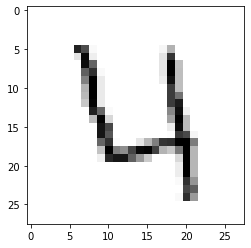

In [3]:
import matplotlib.pyplot as plt
X=A.drop(labels=['label'],axis=1).values
plt.imshow(X[3:4].reshape(28,28),cmap=plt.cm.binary)

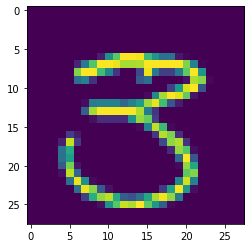

In [5]:
import matplotlib.pyplot as plt
X=A.drop(labels=['label'],axis=1).values
plt.imshow(X[7:8].reshape(28,28))

# One Hot Encoding of Y Column and change that to array

In [6]:
Y=A.label
Y_cat=pd.get_dummies(Y).values
Y_cat[1:50]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0,

# Scaling the X data

In [7]:
X_scaled=X/255
X_scaled[1:50]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Spliting X and Y into training and testing test

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,Y_cat,test_size=0.2,random_state=21)

In [9]:
xtrain.shape

(33600, 784)

In [10]:
xtest.shape

(8400, 784)

# Reshaping data for convolutional neural network

In [11]:
xtrain=xtrain.reshape(33600,28,28,1)
xtest=xtest.reshape(8400,28,28,1)

# Convolutional Neural Network

In [12]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,BatchNormalization,Flatten

In [13]:
es=EarlyStopping(patience=5)
nn=Sequential()
nn.add(Convolution2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
#pooled version of image should be normalize thats why we used BatchNormalization
nn.add(Dropout(0.1))
nn.add(Flatten())
#converting matrix form to flatten(dataset format)
nn.add(Dense(120,activation='relu'))  #Fullyconnected layer
nn.add(Dense(10,activation='softmax')) #output layer

In [14]:
nn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
nn.fit(xtrain,ytrain,epochs=50,validation_split=0.2,callbacks=es)

Epoch 1/50
840/840 [==============================] - 10s 11ms/step - loss: 0.1870 - accuracy: 0.9425 - val_loss: 0.1091 - val_accuracy: 0.9649
Epoch 2/50
840/840 [==============================] - 11s 14ms/step - loss: 0.0594 - accuracy: 0.9811 - val_loss: 0.0839 - val_accuracy: 0.9740
Epoch 3/50
840/840 [==============================] - 13s 15ms/step - loss: 0.0363 - accuracy: 0.9883 - val_loss: 0.0788 - val_accuracy: 0.9765
Epoch 4/50
840/840 [==============================] - 12s 14ms/step - loss: 0.0225 - accuracy: 0.9918 - val_loss: 0.0906 - val_accuracy: 0.9749
Epoch 5/50
840/840 [==============================] - 13s 16ms/step - loss: 0.0212 - accuracy: 0.9928 - val_loss: 0.0855 - val_accuracy: 0.9768
Epoch 6/50
840/840 [==============================] - 14s 17ms/step - loss: 0.0153 - accuracy: 0.9948 - val_loss: 0.1059 - val_accuracy: 0.9719
Epoch 7/50
840/840 [==============================] - 10s 12ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.0828 - val_accuracy:

# Predicting Test Data

In [15]:
pred_prob=nn.predict(xtest)

In [16]:
from numpy import argmax
pred=argmax(pred_prob,axis=1)
pred                            # want highest value form all 10 values thats why used argmax

array([1, 4, 2, ..., 0, 1, 2], dtype=int64)

In [17]:
ytest=argmax(ytest,axis=1)
ytest

array([1, 4, 2, ..., 0, 1, 2], dtype=int64)